<a href="https://colab.research.google.com/github/monigomes/ciencias-de-dados/blob/main/AprendizadoDeMaquina_Modulo3Uni1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aprendizado de Máquina Supervisionado

Módulo 3 - Unidade 2

Árvores de Decisão

In [ ]:
import pandas as pd

# Importando o dataset
from sklearn.datasets import load_iris

# Retornando os dados
data = load_iris()

# Transformando em um DataFrame
iris = pd.DataFrame(data.data)
iris.columns = data.feature_names
iris['target'] = data.target
iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [ ]:
iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [ ]:
# Selecionando apenas as colunas de pétala e esses targets
iris1 = iris.loc[iris.target.isin([1,2]), ['petal length (cm)',
       'petal width (cm)', 'target']]

# Separando X e y
X = iris1.drop('target', axis=1)
y= iris1.target

# Fazendo o train_test_slipt
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

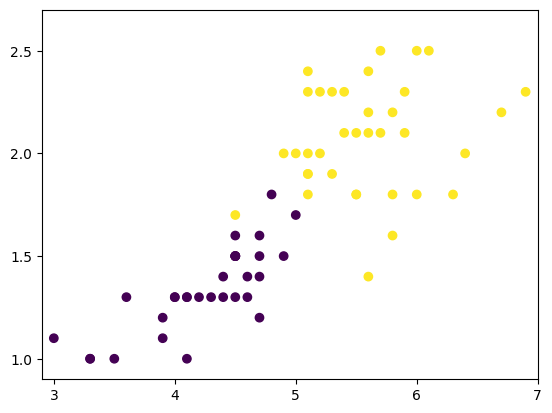

In [ ]:
# Visualizando os dados de treino
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'],
            X_train['petal width (cm)'],
            c=y_train)

ax.set(xlim=(2.9, 7), xticks=[3, 4, 5, 6, 7],
       ylim=(0.9, 2.7), yticks=[1, 1.5, 2, 2.5])

plt.show()

In [ ]:
# Importando a árvore de decisão
from sklearn import tree

# Criando o classificador
clf = tree.DecisionTreeClassifier(random_state=42)

# Fazendo o fit com os dados de treino
clf = clf.fit(X_train, y_train)

# Verificando o score
clf.score(X_train, y_train)

1.0

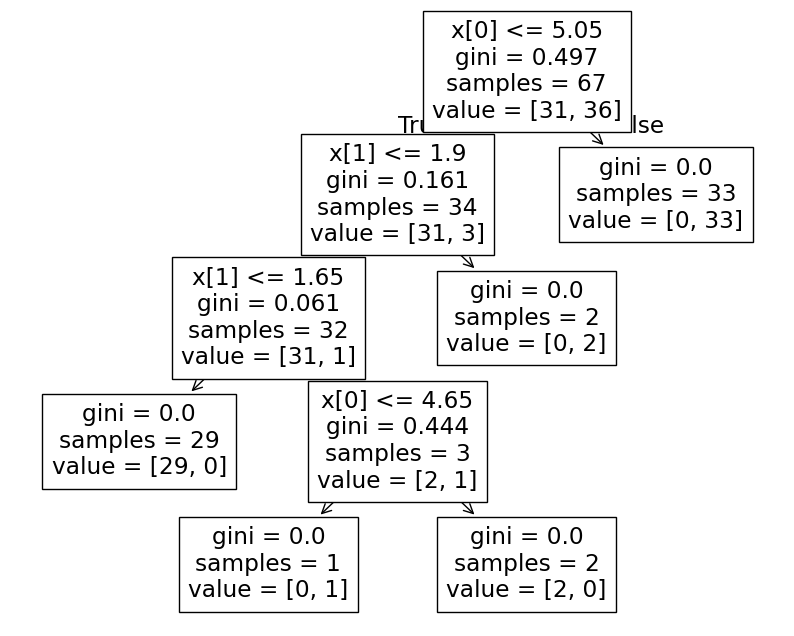

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

tree.plot_tree(clf)

plt.show()

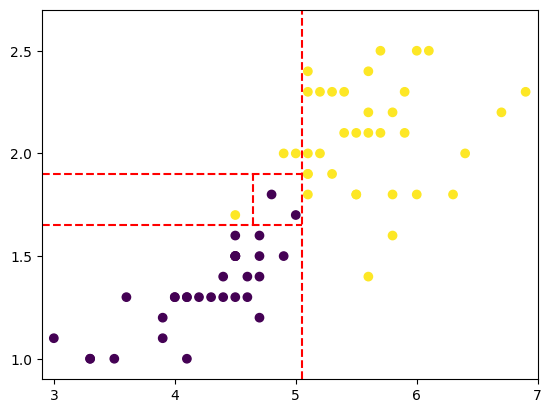

In [ ]:
fig, ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'],
            X_train['petal width (cm)'],
            c=y_train)

ax.plot([5.05,5.05], [0.9,2.7], '--r')
ax.plot([2.9,5.05], [1.9,1.9], '--r')
ax.plot([2.9,5.05], [1.65,1.65], '--r')
ax.plot([4.65,4.65], [1.65,1.9], '--r')

ax.set(xlim=(2.9, 7), xticks=[3, 4, 5, 6, 7],
       ylim=(0.9, 2.7), yticks=[1, 1.5, 2, 2.5])

plt.show()

In [ ]:
# Fazendo a previsão e avaliando o erro
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[18,  1],
       [ 6,  8]])

In [ ]:
# Separando X e y de base completa
X = iris.drop('target', axis=1)
y= iris.target

# Fazendo o train_test_slipt
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Criando o classificador e fazendo fit
clf2 = tree.DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

# Verificando o score
clf2.score(X_train, y_train)

1.0

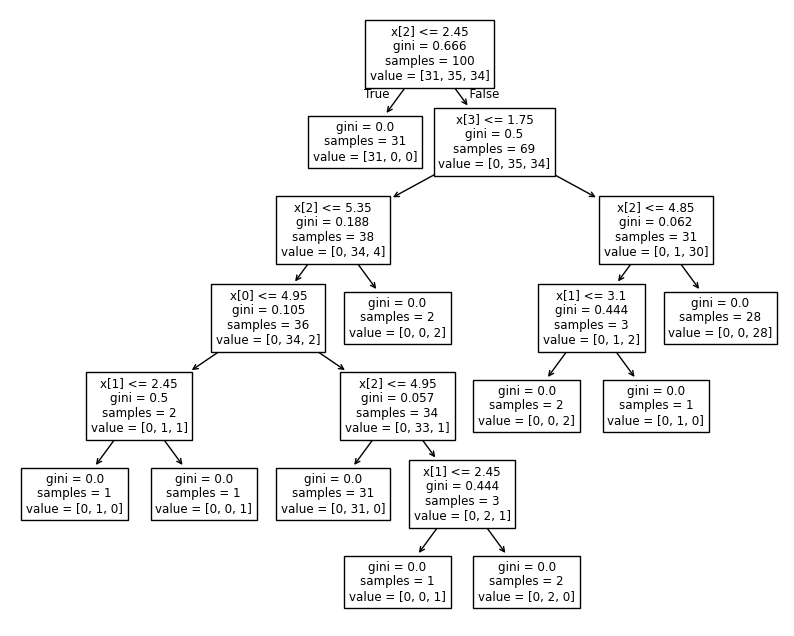

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

tree.plot_tree(clf2)

plt.show()

In [ ]:
# Considerar os dados a seguir
import pandas as pd

dados = pd.DataFrame({
    'x': [1,2,3,4,5],
    'y': [1.3,1.8,3.5,4,4.6]
})

dados.head(2)

,x,y
0,1,1.3
1,2,1.8


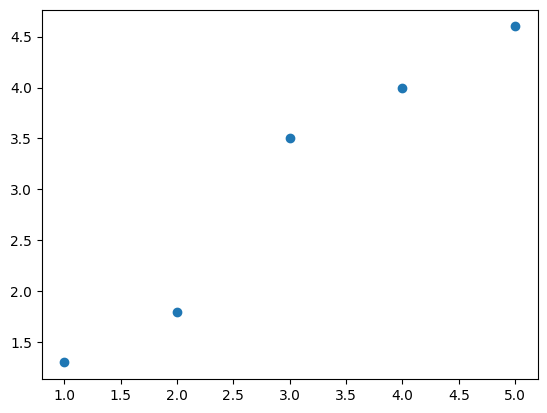

In [ ]:
# Visualizando esses pontos graficamente, podemos traçar uma reta que passa por esses pontos
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(dados.x, dados.y)

plt.show()

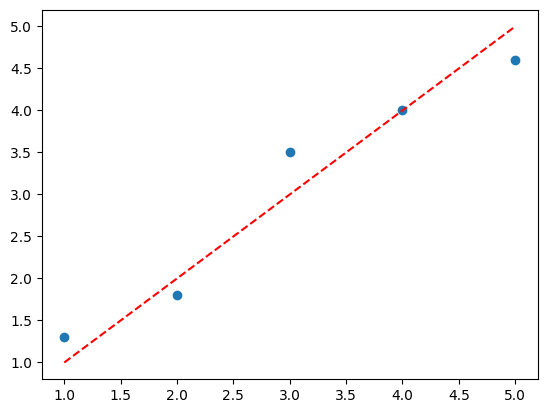

In [ ]:
# Reta vermelha
dados['y_reta'] = dados.x

# Visualizar os pontos graficamente
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(dados.x, dados.y)
ax.plot(dados.x, dados.y_reta, '--r')

plt.show()

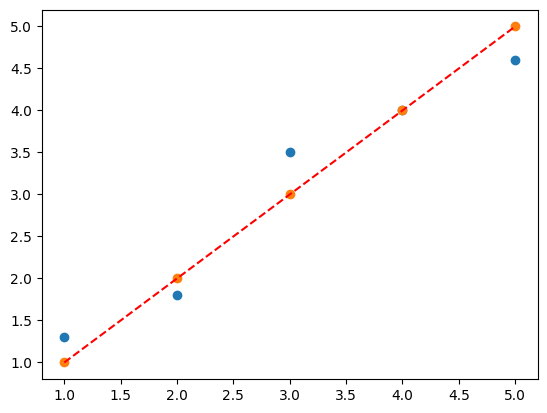

In [ ]:
# Visualizar os pontos graficamente sob a linha em 45 graus
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(dados.x, dados.y)
ax.plot(dados.x, dados.y_reta, '--r')
ax.scatter(dados.x, dados.y_reta)

plt.show()

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)
reg.score(X, y)

reg.coef_

reg.intercept_

reg.predict(np.array([[3, 5]]))

array([16.])

In [ ]:
reg = LinearRegression().fit(dados.x.values.reshape(-1, 1), dados.y)

In [ ]:
# Visualizando o coeficiente angular

a= reg.coef_[0]

# E o coeficiente linear

b= reg.intercept_

In [ ]:
a

0.8799999999999999

In [ ]:
b

0.40000000000000036

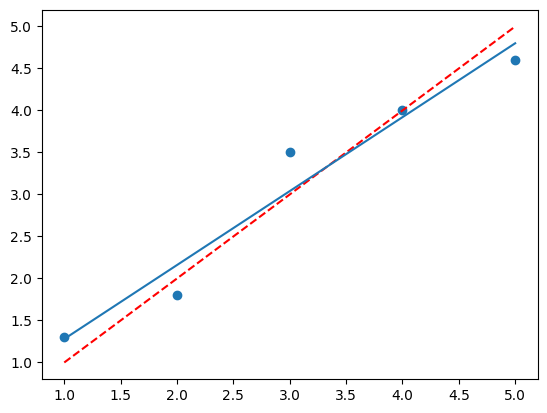

In [ ]:
# Visualizar os pontos graficamente sob a linha em 45 graus
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(dados.x, dados.y)
ax.plot(dados.x, dados.y_reta, '--r')

x = dados.x.values
y = a*x+b

ax.plot(x,y)

plt.show()

In [ ]:
# Calculando o erro da reta vermelha e da regressão

dados['erro_reta'] = (dados.y - dados.y_reta)**2
dados['erro_pred'] = (dados.y - dados.y_reta)**2

# Fazendo a previsão e adicionando na base

dados['y_pred'] = reg.predict(dados.x.values.reshape(-1,1))

dados

,x,y,y_reta,erro_reta,erro_pred,y_pred
0,1,1.3,1,0.09,0.09,1.28
1,2,1.8,2,0.04,0.04,2.16
2,3,3.5,3,0.25,0.25,3.04
3,4,4.0,4,0.00,0.00,3.92
4,5,4.6,5,0.16,0.16,4.80


In [ ]:
# Verificando a base e a soma do erro
dados[['erro_reta', 'erro_pred']].sum()

,0
erro_reta,0.54
erro_pred,0.54


In [ ]:
# Podemos usar o erro médio absoluto e o erro médio quadrático
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Visualizando o resultado da previsão

print(mean_absolute_error(dados.y, dados.y_reta))
print(mean_squared_error(dados.y, dados.y_reta))
print(mean_absolute_error(dados.y, dados.y_pred))
print(mean_squared_error(dados.y, dados.y_pred))


0.2800000000000001
0.10800000000000005
0.22400000000000003
0.07760000000000003


## Aprendizado Supervisionado - II

KNN (K-nearest neighbors)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Gerar dados de exemplo para classificação binária

data, labels = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,
                                   n_clusters_per_class=1, random_state=42)

data, labels

(array([[ 7.33245541e-01, -1.43100684e+00],
        [ 6.56042914e-01,  8.42840539e-01],
        [ 5.37983123e-01, -2.05654971e+00],
        [ 1.28930785e+00, -7.90228359e-02],
        [ 7.20124125e-01,  9.77236854e-01],
        [ 5.61991851e-01, -1.63579119e+00],
        [ 2.27397878e+00, -6.75681514e-01],
        [ 1.56522694e+00,  2.08303420e+00],
        [ 1.21316626e+00,  1.62063670e+00],
        [ 1.28650510e+00, -4.69634644e-01],
        [ 1.28417180e+00, -9.22700896e-01],
        [ 8.22079523e-01, -1.59515966e+00],
        [ 2.72539489e-01,  1.51006394e+00],
        [ 2.42717743e+00, -3.64402467e-01],
        [ 2.63173891e-01,  8.09743991e-01],
        [ 1.39445338e+00, -4.42585367e-01],
        [ 1.32068778e+00,  2.90052459e-01],
        [ 9.05809576e-01, -1.41622254e+00],
        [ 5.68113684e-01, -1.65580986e+00],
        [ 1.19954708e+00, -3.98932506e-01],
        [ 6.93330338e-01,  1.63002545e+00],
        [ 7.28891503e-01, -1.55042626e+00],
        [ 6.32579249e-01, -1.657

In [ ]:
# Dividir os dados em conjuntos de treinamento e teste

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test

# Criando o classificador e fazendo fit
knn_model = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

# Verificando o score
knn_model.score(X_train, y_train)

0.9708333333333333

In [ ]:
# Fazer previsões no conjunto teste
y_pred = knn_model.predict(X_test)

In [ ]:
# Avaliar a precisão do modelo

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

#Imprimir resultados

print(f'Acurácia do modelo: {accuracy * 100:.2F}%')
print('Matriz de Confusão:')
print(conf_matrix)

Acurácia do modelo: 95.00%
Matriz de Confusão:
[[28  1]
 [ 2 29]]


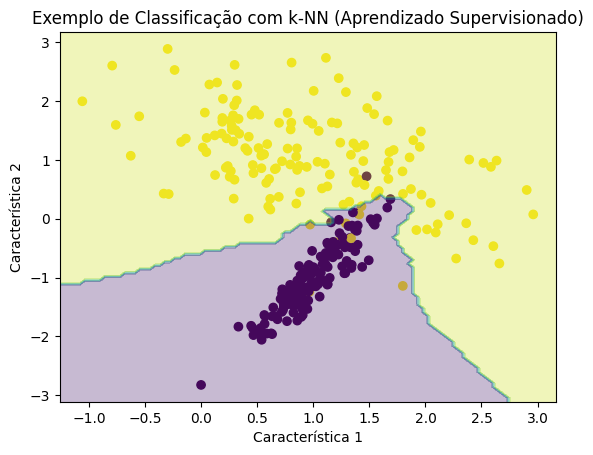

In [ ]:
# Plotando os dados e as regiões de decisão do k-NN

plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
ax = plt.gca()

# Criando grid para avaliar o modelo

xx, yy = np.meshgrid(np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 100),
                                 np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100))
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotar regiões de decisão do k-NN

ax.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.title('Exemplo de Classificação com k-NN (Aprendizado Supervisionado)')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')

plt.show()


## Aprendizado Não Supervisionado

KMeans (clustering)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [ ]:
# Gerar dados aleatórios para clustering

data, _ = make_blobs(n_samples=300, centers=4, random_state=42)

In [ ]:
# Definir o modelo KMeans com 4 clusters (igual ao número de centros usados para gerar os dados)
kmeans = KMeans(n_clusters=4, random_state=42)

# Ajustar o modelo aos dados
kmeans.fit(data)

# Obter os rótulos dos clusters
labels = kmeans.labels_

# Obter os centros dos clusters
centers = kmeans.cluster_centers_

print(labels)
print(centers)

[3 3 0 1 3 1 2 1 0 2 0 2 0 0 3 0 3 2 0 0 2 0 1 3 0 3 3 1 1 2 0 2 3 2 3 0 3
 1 3 1 2 0 3 1 0 0 3 2 3 2 1 3 1 0 1 2 3 2 2 0 3 2 2 0 1 1 1 1 1 0 1 1 3 2
 0 3 1 1 0 1 0 0 3 0 1 3 3 2 2 2 3 0 3 0 0 3 1 0 3 3 2 2 2 0 0 0 0 0 1 3 2
 0 0 0 0 2 3 1 3 1 1 1 0 3 1 3 3 0 3 1 2 0 0 0 0 2 2 3 0 1 0 2 1 0 2 2 2 2
 1 0 0 3 2 1 0 2 1 3 3 2 0 3 1 3 2 3 1 0 0 0 0 0 1 2 2 1 1 2 2 1 3 0 3 2 2
 3 1 0 2 2 1 1 1 3 2 1 1 2 2 3 0 0 1 2 0 1 1 3 1 0 0 1 1 2 3 1 3 3 0 3 3 1
 3 1 2 2 3 3 2 2 2 3 0 1 2 1 3 2 3 3 3 1 1 2 3 1 1 1 3 1 3 1 3 2 1 3 2 0 3
 0 2 0 3 0 1 2 1 2 2 0 0 1 2 2 3 3 1 0 0 2 2 2 2 1 3 2 1 2 2 1 0 1 2 0 3 0
 2 0 3 3]
[[-2.70981136  8.97143336]
 [-6.83235205 -6.83045748]
 [ 4.7182049   2.04179676]
 [-8.87357218  7.17458342]]


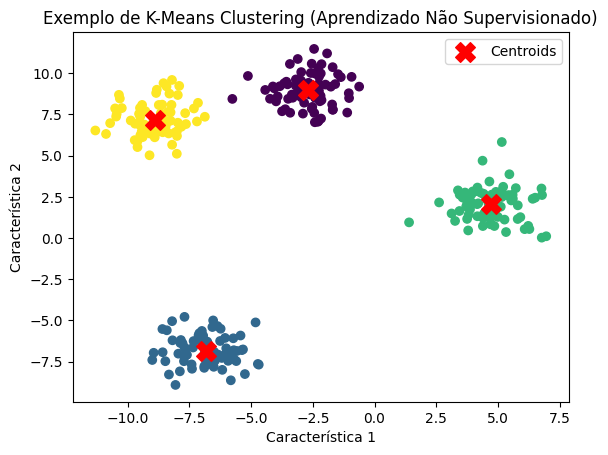

In [ ]:
# Plotar os dados e os clusters encontrados

plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, color='red', label='Centroids')
plt.title('Exemplo de K-Means Clustering (Aprendizado Não Supervisionado)')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()

plt.show()